In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
customers = pd.read_csv('Datasets//olist_customers_dataset.csv')
geolocation = pd.read_csv('Datasets//olist_geolocation_dataset.csv')
order_items = pd.read_csv('Datasets//olist_order_items_dataset.csv')
order_payments = pd.read_csv('Datasets//olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('Datasets//olist_order_reviews_dataset.csv')
orders = pd.read_csv('Datasets//olist_orders_dataset.csv')
products = pd.read_csv('Datasets//olist_products_dataset.csv')
sellers = pd.read_csv('Datasets//olist_sellers_dataset.csv')
category_translation = pd.read_csv('Datasets//product_category_name_translation.csv')


Verificando dados faltantes e duplicados

In [58]:
for df_name, df in [('customers', customers), ('geolocation', geolocation), ('order_items', order_items),
                    ('order_payments', order_payments), ('order_reviews', order_reviews), ('orders', orders),
                    ('products', products), ('sellers', sellers), ('category_translation', category_translation)]:
    print(f"=== {df_name.upper()} ===")
    print("Dados faltantes:\n", df.isnull().sum())
    print("Duplicados: ", df.duplicated().sum(), "\n")

=== CUSTOMERS ===
Dados faltantes:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicados:  0 

=== GEOLOCATION ===
Dados faltantes:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Duplicados:  261831 

=== ORDER_ITEMS ===
Dados faltantes:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicados:  0 

=== ORDER_PAYMENTS ===
Dados faltantes:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Duplicados:  0 

=== ORDER_REVIEWS ===
Dados faltantes:
 review_id                      0
order_id                     

Para obter insights gerais:

In [59]:
for df_name, df in [('customers', customers), ('order_items', order_items), ('products', products)]:
    print(f"=== {df_name.upper()} ===")
    print(df.describe())

=== CUSTOMERS ===
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
=== ORDER_ITEMS ===
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000
=== PRODUCTS ===
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                

Procurar o ultimo pedido valido e filtrar os ultimos 12 meses dele

In [60]:
from datetime import timedelta

orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
last_order_date = orders['order_approved_at'].max()
start_date = last_order_date - timedelta(days=365)
orders_last_year = orders[(orders['order_approved_at'] >= start_date) & (orders['order_approved_at'] <= last_order_date)]

Merge de orders doze meses e orders items

In [61]:
orders_items_last_year = order_items.merge(orders_last_year, on='order_id', how='inner')
orders_items_last_year

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
2,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
3,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04 00:00:00
4,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86243,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,2018-06-19 09:58:03,2018-06-29 13:46:00,2018-07-05 17:51:08,2018-07-23 00:00:00
86244,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
86245,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
86246,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00


merge do ultimo com os products

In [62]:
merge_orders_products_items = orders_items_last_year.merge(products, on='product_id', how='inner')
merge_orders_products_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
2,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
3,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,...,2017-12-18 22:03:38,2018-01-04 00:00:00,telefonia,52.0,815.0,1.0,200.0,27.0,5.0,20.0
4,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,...,2018-07-09 14:04:07,2018-07-25 00:00:00,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86243,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:27:48,...,2018-07-05 17:51:08,2018-07-23 00:00:00,casa_construcao,58.0,918.0,6.0,1050.0,16.0,20.0,16.0
86244,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,2018-05-10 22:56:40,2018-05-18 00:00:00,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
86245,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,2018-07-23 20:31:55,2018-08-01 00:00:00,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
86246,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,2017-10-28 12:22:22,2017-11-10 00:00:00,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0


Limpando algumas colunas

In [63]:
merge_orders_products_items = merge_orders_products_items.drop(columns=['order_delivered_carrier_date', 'order_item_id', 'shipping_limit_date', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
merge_orders_products_items

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_approved_at,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35,cool_stuff
1,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:48:30,moveis_decoracao
2,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:10:18,perfumaria
3,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 12:10:31,telefonia
4,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-05 16:35:48,ferramentas_jardim
...,...,...,...,...,...,...,...,...,...
86243,fffbee3b5462987e66fb49b1c5411df2,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:58:03,casa_construcao
86244,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-25 04:11:01,utilidades_domesticas
86245,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-17 04:31:48,informatica_acessorios
86246,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-24 17:14:25,esporte_lazer


verificando os status existentes do pedido

In [64]:
merge_orders_products_items['order_status'].unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing'],
      dtype=object)

deixando o DF so com status validos

In [65]:
valids_status = ['delivered', 'shipped', 'invoiced']
merge_orders_products_items = merge_orders_products_items[merge_orders_products_items['order_status'].isin(valids_status)]
merge_orders_products_items

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_approved_at,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35,cool_stuff
1,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:48:30,moveis_decoracao
2,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:10:18,perfumaria
3,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 12:10:31,telefonia
4,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-05 16:35:48,ferramentas_jardim
...,...,...,...,...,...,...,...,...,...
86243,fffbee3b5462987e66fb49b1c5411df2,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:58:03,casa_construcao
86244,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-25 04:11:01,utilidades_domesticas
86245,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-17 04:31:48,informatica_acessorios
86246,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-24 17:14:25,esporte_lazer


Calculando receita por categoria

In [66]:
category_revenue = merge_orders_products_items.groupby('product_category_name')['price'].sum().reset_index()


Forma decrescente

In [67]:
category_revenue = category_revenue.sort_values(by='price', ascending=False)
categoria_maior_receita = category_revenue.iloc[0]
categoria_menor_receita = category_revenue.iloc[-1]

print

In [68]:
print(categoria_maior_receita)


product_category_name    beleza_saude
price                      1000454.92
Name: 11, dtype: object


In [69]:
print(categoria_menor_receita)

product_category_name    seguros_e_servicos
price                                 100.0
Name: 67, dtype: object


distribuicao de preços

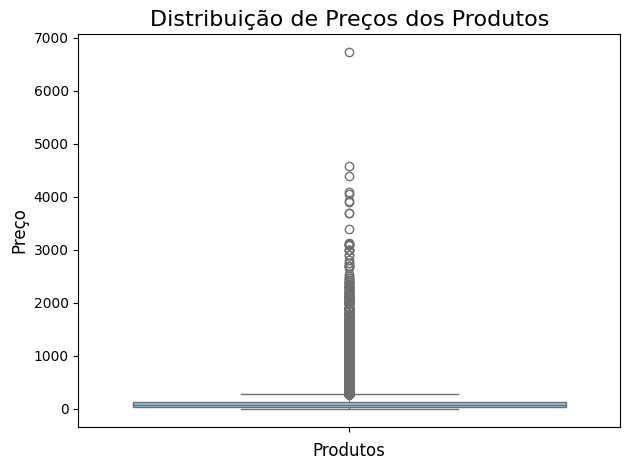

In [105]:
sns.boxplot(data=merge_orders_products_items, y='price', color='skyblue')
plt.title('Distribuição de Preços dos Produtos', fontsize=16)
plt.ylabel('Preço', fontsize=12)
plt.xlabel('Produtos', fontsize=12)
plt.tight_layout()
plt.show()

distribuicao de preco do frete

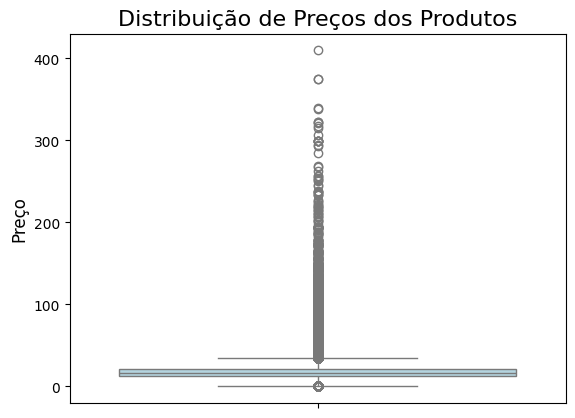

In [ ]:
sns.boxplot(y=merge_orders_products_items['freight_value'], color='lightblue')
plt.title('Distribuição de Preços dos fretes', fontsize=16)
plt.ylabel('Preço', fontsize=12)
plt.show()

Fazendo merge com sellers

In [72]:
merged_sellers = merge_orders_products_items.merge(sellers, on='seller_id', how='left')
merged_sellers

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_approved_at,product_category_name,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35,cool_stuff,27277,volta redonda,SP
1,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:48:30,moveis_decoracao,37564,borda da mata,MG
2,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:10:18,perfumaria,14403,franca,SP
3,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 12:10:31,telefonia,1026,sao paulo,SP
4,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-05 16:35:48,ferramentas_jardim,19010,presidente prudente,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
85692,fffbee3b5462987e66fb49b1c5411df2,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,119.85,20.03,11a0e041ea6e7e21856d2689b64e7f3a,delivered,2018-06-19 09:58:03,casa_construcao,13321,salto,SP
85693,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-25 04:11:01,utilidades_domesticas,88303,itajai,SC
85694,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-17 04:31:48,informatica_acessorios,1206,sao paulo,SP
85695,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-24 17:14:25,esporte_lazer,80610,curitiba,PR


calcular receitar de cada vendedor

In [73]:
seller_revenue = merged_sellers.groupby('seller_id')['price'].sum().reset_index()

Ordenar por receita de forma decrescente e crescente

In [74]:
top_10_maiores_sellers = seller_revenue.sort_values(by='price', ascending=False).head(10)
top_10_piores_sellers = seller_revenue.sort_values(by='price', ascending=True).head(10)


print

In [75]:
print(top_10_maiores_sellers)

                             seller_id      price
749   4869f7a5dfa277a7dca6462dcf3b52b2  202976.20
880   53243585a1d6dc2643021fd1853d8905  171310.43
2562  fa1c13f2614d7b5c4749cbc52fecda94  151191.84
169   1025f0e2d44d7041d6cf58b6550e0bfa  133203.95
1312  7c67e1448b00f6e969d365cea6b010ab  132213.92
1554  955fee9216a65b617aa5c0531780ce60  132208.93
2251  da8622b14eb17ae2831f4ac5b9dab84a  132075.57
769   4a3ca9315b744ce9f8e9374361493884  127185.53
1317  7d13fca15225358621be4086e1eb0964  113628.97
1064  6560211a19b47992c3666cc44a7e94c0   99240.88


In [76]:
print(top_10_piores_sellers)

                             seller_id  price
331   1fa2d3def6adfa70e58c276bb64fe5bb   6.90
89    08061dc0fc165ed41288cc7acde738ee   7.90
757   4965a7002cca77301c82d3f91b82e1a9   8.49
1985  c18309219e789960add0b2255ca4b091   9.90
1558  95cca791657aabeff15a07eb152d7841   9.99
550   344223b2a90784f64136a8a5da012e7f  10.90
2103  cc1f04647be106ba74e62b21f358af25  11.90
612   3ac588cd562971392504a9e17130c40b  11.90
642   3d62f86afa7c73be2628a3be1423f5a0  12.00
1987  c1dde11f12d05c478f5de2d7319ad3b2  12.50


Vereficar se vendem o mesmo produto

In [77]:
sellers_same_product = merge_orders_products_items.groupby(['product_id', 'seller_id']).size().reset_index(name='count')
sellers_same_product = sellers_same_product[sellers_same_product['count'] > 1]

Exibir os sellers que vendem o mesmo produto

In [78]:
print(sellers_same_product)

                             product_id                         seller_id  \
3      000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   
6      00126f27c813603687e6ce486d909d01  cd68562d3f44870c08922d380acae552   
7      001795ec6f1b187d37335e1c4704762e  8b321bb669392f5163d04c59e235e066   
9      001b72dfd63e9833e8c02742adf472e3  8a32e327fe2c1b3511609d81aaf9f042   
10     002159fe700ed3521f46cfcf6e941c76  048c2757535328e0d7dac690ad3c0aae   
...                                 ...                               ...   
27427  ffe8083298f95571b4a66bfbc1c05524  3b15288545f8928d3e65a8f949a28291   
27430  ffedbd68fa6f44e788ff6c2db8094715  89de2d6f23e9746ff309705b23581faa   
27431  ffef256879dbadcab7e77950f4f4a195  113e3a788b935f48aad63e1c41dac1bd   
27432  fff0a542c3c62682f23305214eaeaa24  08d2d642cf72b622b14dde1d2f5eb2f5   
27439  fffdb2d0ec8d6a61f0a0a0db3f25b441  9f505651f4a6abe901a56cdc21508025   

       count  
3          2  
6          2  
7          9  
9          4  


variacao de preço entre os vendedores

In [79]:
price_variation = merge_orders_products_items.groupby(['product_id', 'seller_id'])['price'].agg(['min', 'max', 'mean', 'std']).reset_index()
print(price_variation)

                             product_id                         seller_id  \
0      00066f42aeeb9f3007548bb9d3f33c38  5670f4db5b62c43d542e1b2d56b0cf7c   
1      00088930e925c41fd95ebfe695fd2655  7142540dd4c91e2237acb7e911c4eba2   
2      0009406fd7479715e4bef61dd91f2462  4a3ca9315b744ce9f8e9374361493884   
3      000b8f95fcb9e0096488278317764d19  40ec8ab6cdafbcc4f544da38c67da39a   
4      000d9be29b5207b54e86aa1b1ac54872  8ae520247981aa06bc94abddf5f46d34   
...                                 ...                               ...   
27436  fff6177642830a9a94a0f2cba5e476d1  7a67c85e85bb2ce8582c35f2203ad736   
27437  fff81cc3158d2725c0655ab9ba0f712c  778323240ce2830d68aab11794e00bfb   
27438  fff9553ac224cec9d15d49f5a263411f  643214e62b870443ccbe55ab29a4dccf   
27439  fffdb2d0ec8d6a61f0a0a0db3f25b441  9f505651f4a6abe901a56cdc21508025   
27440  fffe9eeff12fcbd74a2f2b007dde0c58  7299e27ed73d2ad986de7f7c77d919fa   

          min     max    mean       std  
0      101.65  101.65  101.65    

Inflacao: Adicionar a coluna 'year_month' (ano e mês)

In [80]:
merge_orders_products_items['year_month'] = merge_orders_products_items['order_approved_at'].dt.to_period('M')

C:\Users\kauak\AppData\Local\Temp\ipykernel_13316\2888278473.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Agrupar por 'product_id' e 'year_month', calculando o preço médio

In [81]:
monthly_prices = merge_orders_products_items.groupby(['product_id', 'year_month'])['price'].mean().reset_index()

Encontrar o mês inicial e final de cada produto

In [82]:
initial_prices = monthly_prices.groupby('product_id').first().reset_index()
final_prices = monthly_prices.groupby('product_id').last().reset_index()

Renomear colunas

In [83]:
initial_prices.rename(columns={'price': 'price_initial', 'year_month': 'month_initial'}, inplace=True)
final_prices.rename(columns={'price': 'price_final', 'year_month': 'month_final'}, inplace=True)

Juntar os dados iniciais e finais

In [84]:
price_comparison = pd.merge(initial_prices, final_prices, on='product_id')

Calcular a var

In [85]:
price_comparison['var_r$'] = price_comparison['price_final'] - price_comparison['price_initial']
price_comparison['var_percent'] = (price_comparison['var_r$'] / price_comparison['price_initial']) * 100

In [86]:
price_comparison[['product_id', 'price_initial', 'price_final', 'var_r$', 'var_percent']].head(-10)

,product_id,price_initial,price_final,var_r$,var_percent
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,101.65,0.0,0.000000
1,00088930e925c41fd95ebfe695fd2655,129.90,129.90,0.0,0.000000
2,0009406fd7479715e4bef61dd91f2462,229.00,229.00,0.0,0.000000
3,000b8f95fcb9e0096488278317764d19,58.90,58.90,0.0,0.000000
4,000d9be29b5207b54e86aa1b1ac54872,199.00,199.00,0.0,0.000000
...,...,...,...,...,...
26315,ffe75578163d45caa52bca3529cb511e,27.99,27.99,0.0,0.000000
26316,ffe8083298f95571b4a66bfbc1c05524,77.99,89.99,12.0,15.386588
26317,ffe9468f4d890db80b7231e86931ff37,750.00,750.00,0.0,0.000000
26318,ffeb228c521d5464d1f71444da96c446,34.99,34.99,0.0,0.000000


grafico

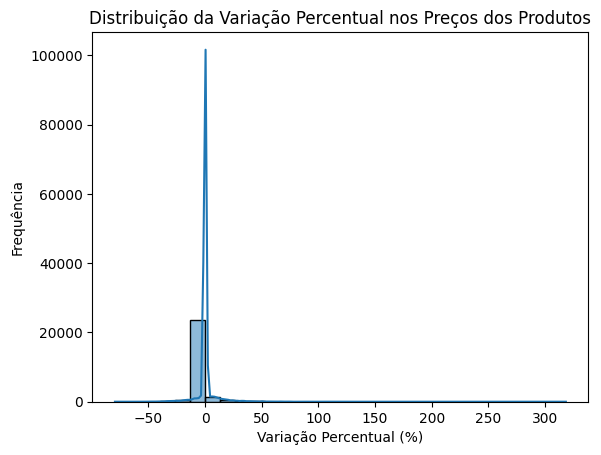

In [87]:
sns.histplot(price_comparison['var_percent'], bins=30, kde=True)
plt.title('Distribuição da Variação Percentual nos Preços dos Produtos')
plt.xlabel('Variação Percentual (%)')
plt.ylabel('Frequência')
plt.show()

merge para a coluna de order reviews

In [88]:
merge_orders_products_items_reviews = pd.merge(merge_orders_products_items, order_reviews, on='order_id', how='inner')
merge_orders_products_items_reviews.head(-10)

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_approved_at,product_category_name,year_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35,cool_stuff,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:48:30,moveis_decoracao,2018-01,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
2,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:10:18,perfumaria,2018-08,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
3,00054e8431b9d7675808bcb819fb4a32,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 12:10:31,telefonia,2017-12,0381de7572d99d75230ce91207807265,4,NaN,NaN,2017-12-19 00:00:00,2017-12-29 02:40:12
4,000576fe39319847cbb9d288c5617fa6,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-05 16:35:48,ferramentas_jardim,2018-07,f0733ebeb51b637dfdc953983c867b89,5,NaN,NaN,2018-07-10 00:00:00,2018-07-11 20:14:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85421,fff8286f77788ab8b55b2e5747fa7dd8,a2da86fa759178e9e58e54aa1a144e59,ea8482cd71df3c1969d7b9473ff13abc,24.99,15.28,e79f494063c25f5c673222d8a2cc6f47,delivered,2018-07-05 16:22:01,telefonia,2018-07,04be5443ee0904052de26dcaaf90dff9,4,NaN,NaN,2018-07-07 00:00:00,2018-07-10 16:11:34
85422,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,180.00,48.14,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:29:22,informatica_acessorios,2018-03,2b97d83f7c2b3a3b4285174e77379fbc,5,NaN,Tudo ok,2018-04-08 00:00:00,2018-04-12 20:25:15
85423,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,180.00,48.14,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:29:22,informatica_acessorios,2018-03,2b97d83f7c2b3a3b4285174e77379fbc,5,NaN,Tudo ok,2018-04-08 00:00:00,2018-04-12 20:25:15
85424,fff90cdcb3b2e6cfb397d05d562fd3fe,764292b2b0f73f77a0272be03fdd45f3,bd23da7354813347129d751591d1a6e2,89.90,11.83,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 10:11:58,moveis_decoracao,2017-11,d36aebe5756a7aecd9805954a8533285,5,NaN,NaN,2017-11-30 00:00:00,2017-12-02 10:52:34


categorizando os reviews

In [89]:
merge_orders_products_items_reviews['review_category'] = pd.cut(
    merge_orders_products_items_reviews['review_score'],
    bins=[0, 2, 3, 5],  
    labels=['ruim', 'regular', 'boa']
)

pegando as reviews boas

In [90]:
positive_reviews = merge_orders_products_items_reviews[ merge_orders_products_items_reviews
                                                       ['review_category'] == 'boa']

contar reviwes postivas

In [91]:
seller_positive_reviews = (
    positive_reviews.groupby('seller_id')
    .size()
    .reset_index(name='positive_reviews_count')
)

pegando os 10 primeiros

In [92]:
top_10_sellers_reviews = seller_positive_reviews.sort_values( by='positive_reviews_count',ascending=False
).head(10)
print(top_10_sellers_reviews)

                             seller_id  positive_reviews_count
313   1f50f920176fa81dab994f9023523100                    1209
1015  6560211a19b47992c3666cc44a7e94c0                    1146
1483  955fee9216a65b617aa5c0531780ce60                    1097
2139  da8622b14eb17ae2831f4ac5b9dab84a                    1014
165   1025f0e2d44d7041d6cf58b6550e0bfa                     958
2003  cc419e0650a3c5ba77189a1882b7556a                     915
2293  ea8482cd71df3c1969d7b9473ff13abc                     859
731   4a3ca9315b744ce9f8e9374361493884                     819
712   4869f7a5dfa277a7dca6462dcf3b52b2                     798
1395  8b321bb669392f5163d04c59e235e066                     761


reviews ruins

In [93]:
negative_reviews = merge_orders_products_items_reviews[
    merge_orders_products_items_reviews['review_category'] == 'ruim'
]


Contar reviews negativas por vendendor

In [94]:
seller_negative_reviews = (
    negative_reviews.groupby('seller_id')
    .size()
    .reset_index(name='negative_reviews_count')
)

ordernando e pegando top10

In [95]:
top_10_worst_sellers_reviews = seller_negative_reviews.sort_values(
    by='negative_reviews_count',
    ascending=False
).head(10)
print(top_10_worst_sellers_reviews)

                             seller_id  negative_reviews_count
766   7c67e1448b00f6e969d365cea6b010ab                     330
201   1f50f920176fa81dab994f9023523100                     323
618   6560211a19b47992c3666cc44a7e94c0                     291
103   1025f0e2d44d7041d6cf58b6550e0bfa                     287
454   4a3ca9315b744ce9f8e9374361493884                     283
909   955fee9216a65b617aa5c0531780ce60                     212
1306  da8622b14eb17ae2831f4ac5b9dab84a                     198
1406  ea8482cd71df3c1969d7b9473ff13abc                     196
1218  cc419e0650a3c5ba77189a1882b7556a                     185
858   8b321bb669392f5163d04c59e235e066                     174


vendas por seller

In [96]:
seller_sales = merge_orders_products_items.groupby('seller_id').size().reset_index(name='sales_count')


reviews por seller

In [97]:
seller_reviews = merge_orders_products_items_reviews.groupby('seller_id').size().reset_index(name='reviews_count')


merge dos 2

In [98]:
seller_sales_reviews = pd.merge(seller_sales, seller_reviews, on='seller_id', how='inner')

correlacao

In [99]:
correlation = seller_sales_reviews['sales_count'].corr(seller_sales_reviews['reviews_count'])
print(f'Correlação entre vendas e reviews: {correlation}')

Correlação entre vendas e reviews: 0.9999362932493866


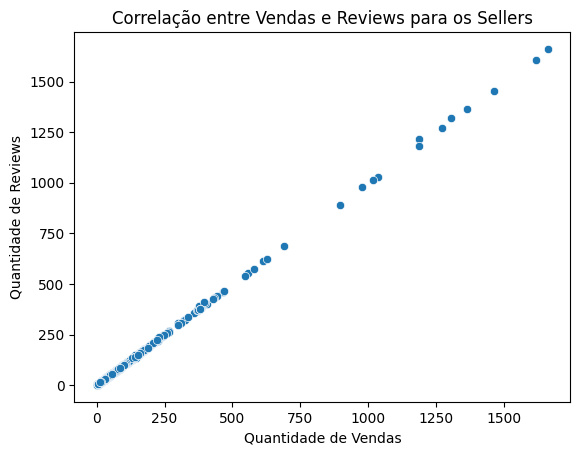

In [100]:
sns.scatterplot(x='sales_count', y='reviews_count', data=seller_sales_reviews)

plt.title('Correlação entre Vendas e Reviews para os Sellers')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Quantidade de Reviews')
plt.show()

Análise de vendas em dias especificos

coluna dia da semana

In [101]:
merge_orders_products_items['day_of_week'] = merge_orders_products_items['order_approved_at'].dt.day_name()

C:\Users\kauak\AppData\Local\Temp\ipykernel_13316\1556651450.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



contar as vendar por dia

In [102]:
sales_by_day = (
    merge_orders_products_items.groupby('day_of_week')['price']
    .count()
    .reset_index()
    .rename(columns={'price': 'sales_count'})
)

Ordenar os dias da semana para visualização correta

In [103]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day['day_of_week'] = pd.Categorical(sales_by_day['day_of_week'], categories=days_order, ordered=True)
sales_by_day = sales_by_day.sort_values('day_of_week')

Grafico

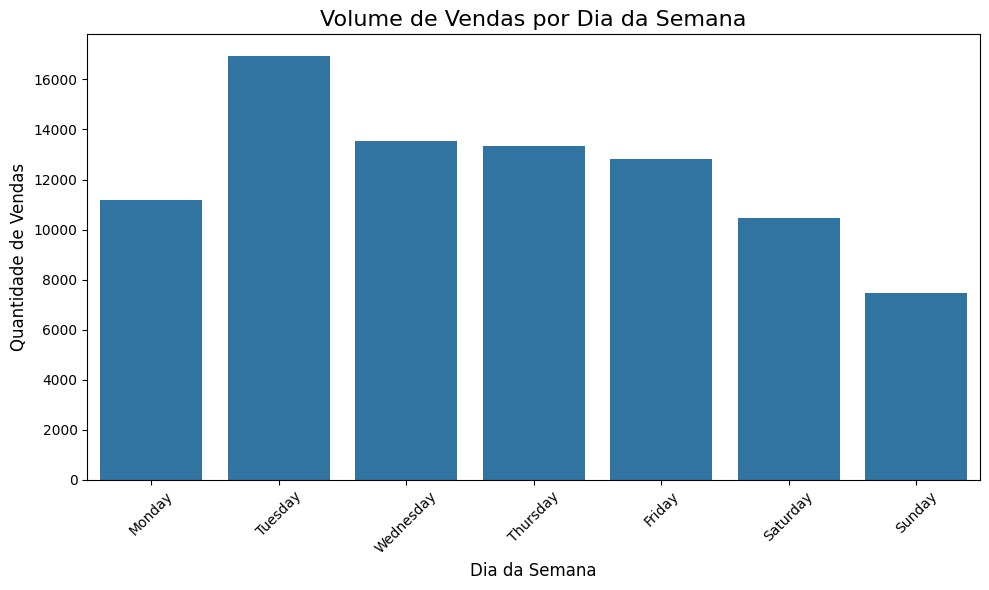

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day, x='day_of_week', y='sales_count', )
plt.title('Volume de Vendas por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()